## Download and extract the Dataset

In [2]:
# Install gdown if not already installed
!pip install -q gdown

import gdown
import zipfile
import os

# Your Google Drive file ID
file_id = '1ISI3hgfGqqbBPipLK7bMSIXw5s0fkKMm'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the dataset
output = '/content/dataset.zip'
print("Downloading dataset from Google Drive...")
gdown.download(url, output, quiet=False)
print("Download complete!")

# Unzip the file
extract_path = '/content/dataset/'
print("Extracting files...")
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f"Dataset extracted to: {extract_path}")

# Optional: Remove the zip file to save space
os.remove(output)
print("Zip file removed to save space.")

# List extracted contents
print("\nExtracted contents:")
for item in os.listdir(extract_path):
    print(f"  {item}")

Downloading...
From (original): https://drive.google.com/uc?id=1ISI3hgfGqqbBPipLK7bMSIXw5s0fkKMm
From (redirected): https://drive.google.com/uc?id=1ISI3hgfGqqbBPipLK7bMSIXw5s0fkKMm&confirm=t&uuid=4df3571a-761e-461c-a3c0-53833ce19603
To: /content/dataset.zip
100%|██████████| 1.23G/1.23G [00:21<00:00, 58.2MB/s]


Download complete!
Extracting files...
Dataset extracted to: /content/dataset/
Zip file removed to save space.

Extracted contents:
  Fake Notes
  Real Notes


In [ ]:
!pip install tensorflow

In [4]:
#import libraries

import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D

In [5]:
#dataset path

dataset_directory = "/content/dataset"

## Creating Random Train and Validation Splits

In [6]:
# train-test-splits
training_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                               labels="inferred",
                                                               image_size=(224, 224),
                                                               batch_size=16,
                                                               subset="training",
                                                               validation_split=0.222222222,
                                                               seed=123
                                                               )

validation_data = tf.keras.preprocessing.image_dataset_from_directory(dataset_directory,
                                                              labels="inferred",
                                                              image_size=(224, 224),
                                                              batch_size=16,
                                                              subset="validation",
                                                              validation_split=0.222222222,
                                                              seed=123
                                                              )

Found 1600 files belonging to 2 classes.
Using 1245 files for training.
Found 1600 files belonging to 2 classes.
Using 355 files for validation.


In [7]:
#classes labels
print(len(training_data.class_names), "Classes are:", training_data.class_names)

2 Classes are: ['Fake Notes', 'Real Notes']


## Visualization

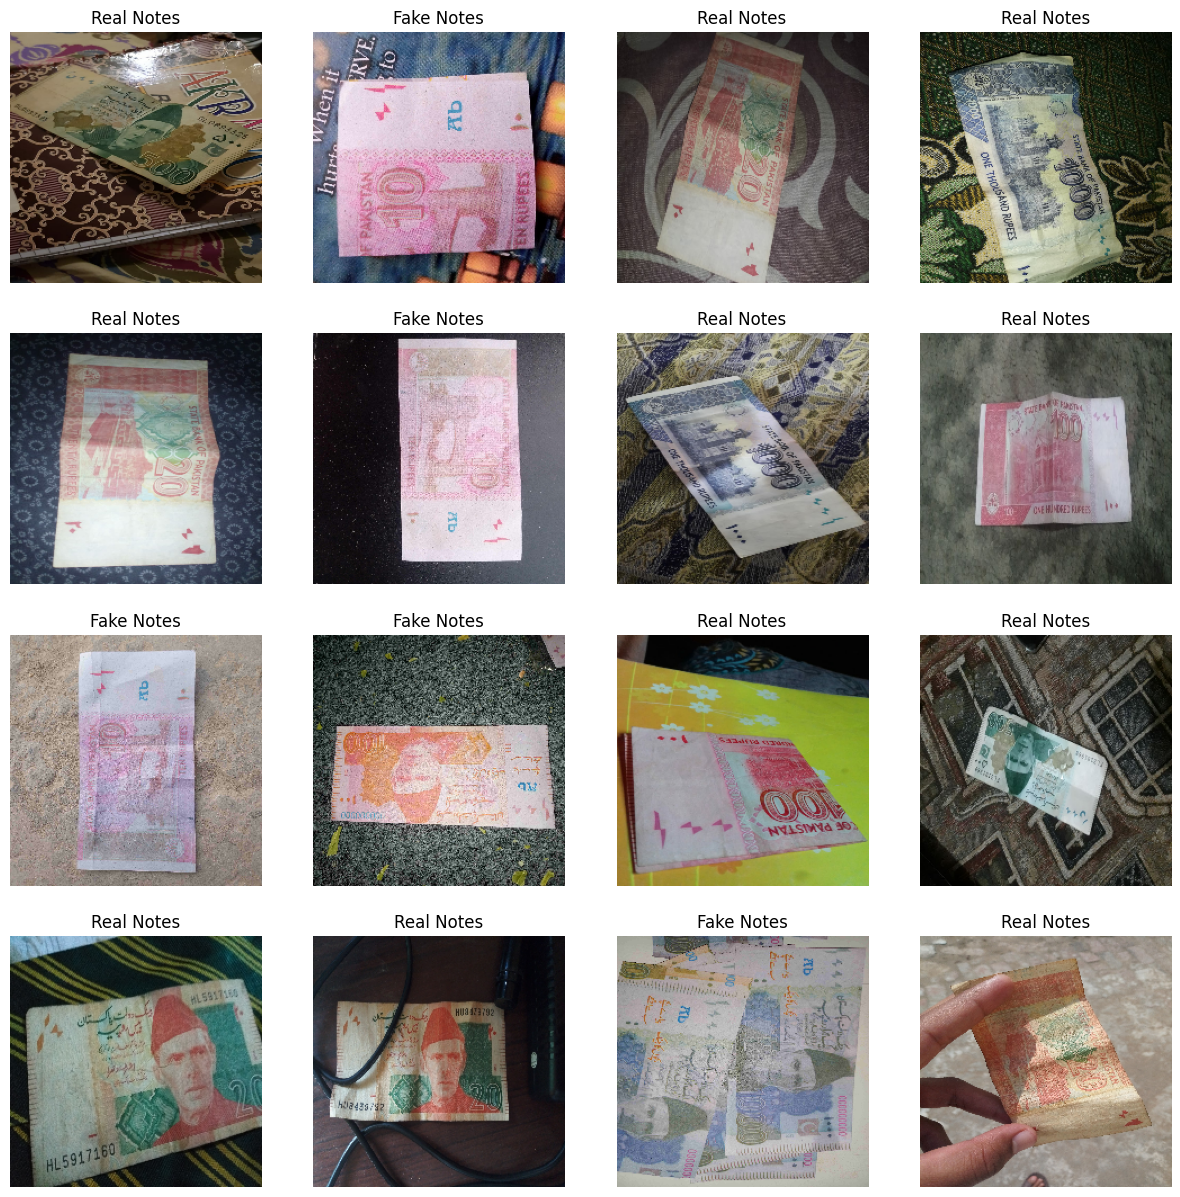

In [8]:
#image plot
plt.figure(figsize=(15, 15))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(training_data.class_names[labels[i]])
    plt.axis('off')

In [9]:
training_data.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Model Architecture and Training

In [10]:
num_classes = len(training_data.class_names)

inputs = keras.Input(shape=(224, 224, 3))

x = keras.applications.vgg16.preprocess_input(inputs)

# Load pre-trained Xception model
base_model = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model
base_model.trainable = False

# Pass inputs through base model
x = base_model(x)

# Add pooling layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add dropout layer
x = keras.layers.Dropout(0.2)(x)

# Add dense output layer with softmax activation
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)

# Define the model
model = keras.Model(inputs, outputs)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

epochs = 50

history = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = epochs)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 57s 597ms/step - accuracy: 0.5023 - loss: 2.5417 - val_accuracy: 0.8197 - val_loss: 0.5716
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 505ms/step - accuracy: 0.7721 - loss: 0.8477 - val_accuracy: 0.8761 - val_loss: 0.3786
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 476ms/step - accuracy: 0.8627 - loss: 0.4528 - val_accuracy: 0.8930 - val_loss: 0.2871
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 498ms/step - accuracy: 0.8811 - loss: 0.4004 - val_accuracy: 0.9099 - val_loss: 0.2195
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 491ms/step - accuracy: 0.9066 - loss: 0.2860 - val_accuracy: 0.8986 - val_loss: 0.2582
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 37s 476ms/step - accuracy: 0.9100 - loss: 0.2643 - val_accuracy: 0.8986 - val_loss: 0.2691
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 43s 512ms/step - accuracy: 0.9132 - loss: 0.2431 - val_accuracy: 0.9155 - val_loss: 0.2153
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 505m

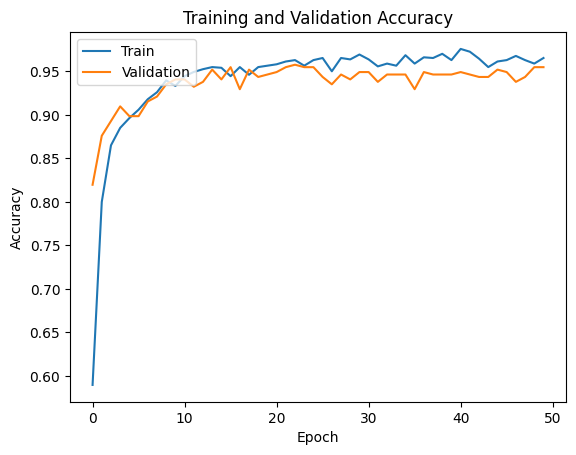

In [11]:
import matplotlib.pyplot as plt
# Plot training and validation metrics
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
max_train_accuracy = max(history.history['accuracy'])
print('Maximum Training Accuracy:', max_train_accuracy)
max_val_accuracy = max(history.history['val_accuracy'])
print('Maximum Validation Accuracy:', max_val_accuracy)

Maximum Training Accuracy: 0.9759036302566528
Maximum Validation Accuracy: 0.9577465057373047


## Model Finetuning

In [13]:
#Fine tuning the entire model

#unfreeze the top layers
base_model.tainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=.00001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"])

from tensorflow.keras.callbacks import ModelCheckpoint

# Define a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.weights.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=True,
                             mode='max')

history_ft = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = 20,
                    callbacks=[checkpoint])

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 45s 526ms/step - accuracy: 0.9608 - loss: 0.0789 - val_accuracy: 0.9493 - val_loss: 0.1800
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 504ms/step - accuracy: 0.9758 - loss: 0.0798 - val_accuracy: 0.9521 - val_loss: 0.1792
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 39s 501ms/step - accuracy: 0.9741 - loss: 0.0710 - val_accuracy: 0.9521 - val_loss: 0.1794
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 41s 506ms/step - accuracy: 0.9709 - loss: 0.0767 - val_accuracy: 0.9521 - val_loss: 0.1794
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 507ms/step - accuracy: 0.9816 - loss: 0.0581 - val_accuracy: 0.9521 - val_loss: 0.1796
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 38s 474ms/step - accuracy: 0.9678 - loss: 0.0842 - val_accuracy: 0.9521 - val_loss: 0.1787
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 37s 475ms/step - accuracy: 0.9746 - loss: 0.0880 - val_accuracy: 0.9521 - val_loss: 0.1789
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 40s 464ms/step - accuracy: 0.9714 - loss: 0.0798 - val_accu

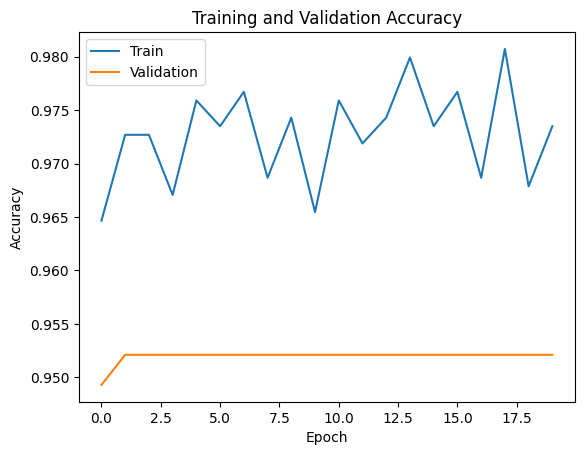

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation metrics
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
# Define the exact same architecture again (or keep it in memory)
best_model = model.load_weights('best_model.weights.h5')


In [16]:
model.export('vgg16_finetuned_model')

Saved artifact at 'vgg16_finetuned_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  134381004116944: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  134381004117904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004118864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004120016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004120976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004121168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004121744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004119440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004121552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134381004123088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model('vgg16_finetuned_model')
tflite_model = converter.convert()

with open('vgg16_finetuned_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [18]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='/content/vgg16_finetuned_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [19]:
import numpy as np
from PIL import Image

def preprocess_image(image_path):
    img = Image.open(image_path).resize((224, 224))  # Resize to VGG16 input size
    img = np.array(img).astype(np.float32)
    img = tf.keras.applications.vgg16.preprocess_input(img)  # Same preprocessing as during training
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img


In [20]:
def predict(image_path, class_names):
    img = preprocess_image(image_path)
    interpreter.set_tensor(input_details[0]['index'], img)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    predicted_index = np.argmax(output)
    confidence = np.max(output)
    return class_names[predicted_index], confidence


In [21]:
import matplotlib.pyplot as plt

# Show the image with prediction
def show_prediction(image_path, label, confidence):
    img = Image.open(image_path)

    plt.imshow(img)
    plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

Predicted Class: Fake Notes (63.45% confidence)


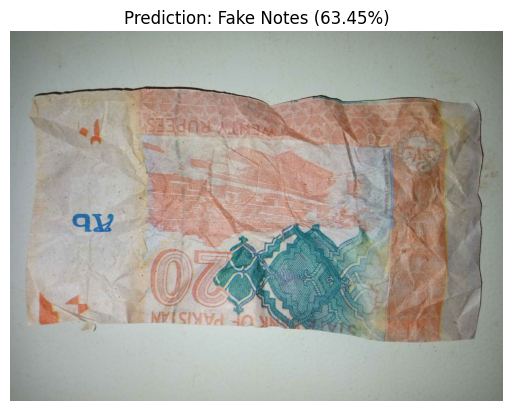

In [29]:
# Assuming these are your class names (can also get from training_data.class_names)
class_names = ['Fake Notes', 'Real Notes']

# Path to test image (from Google Drive or local)
image_path = '/content/dataset/Fake Notes/fakes-Notes (130).jpg'  # Update as needed

label, conf = predict(image_path, class_names)

print(f"Predicted Class: {label} ({conf * 100:.2f}% confidence)")
show_prediction(image_path, label, conf)

Predicted Class: Real Notes (100.00% confidence)


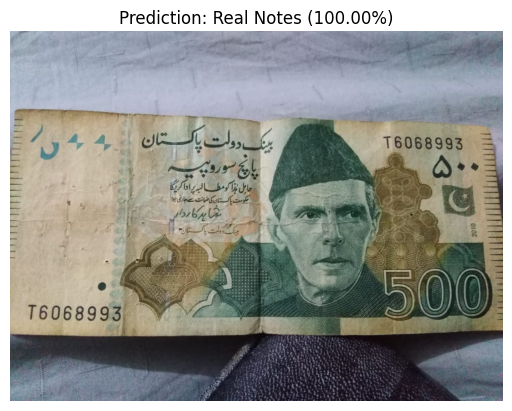

In [25]:
# Path to test image (from Google Drive or local)
image_path = '/content/dataset/Real Notes/Real-Notes (101).jpg'  # Update as needed

label, conf = predict(image_path, class_names)

print(f"Predicted Class: {label} ({conf * 100:.2f}% confidence)")
show_prediction(image_path, label, conf)